# YOU MUST RUN Airflow `taxi` Pipeline BEFORE YOU CONTINUE !!!

![Completed Airflow DAG](https://raw.githubusercontent.com/PipelineAI/site/master/assets/img/airflow-dag-complete.png)

# Analyze Model Performance

Use the code below to run TensorFlow Model Analysis on the model in your pipeline. Start by importing and opening the metadata store.

In [1]:
from __future__ import print_function

import os
import tfx_utils

def _make_default_sqlite_uri(pipeline_name):
    return os.path.join('/mnt/pipelineai/users/airflow-dags/tfx/metadata', pipeline_name, 'metadata.db')

def get_metadata_store(pipeline_name):
    return tfx_utils.TFXReadonlyMetadataStore.from_sqlite_db(_make_default_sqlite_uri(pipeline_name))

pipeline_name = 'taxi' # or taxi_solution
pipeline_db_path = _make_default_sqlite_uri(pipeline_name)
print('Pipeline DB:\n{}'.format(pipeline_db_path))

store = get_metadata_store(pipeline_name)

/opt/conda/lib/python3.6/site-packages/apache_beam/__init__.py:84: UserWarning: Running the Apache Beam SDK on Python 3 is not yet fully supported. You may encounter buggy behavior or missing features.
  'Running the Apache Beam SDK on Python 3 is not yet fully supported. '


Pipeline DB:
/mnt/pipelineai/users/airflow-dags/tfx/metadata/taxi/metadata.db


# Show Model Artifacts

In [2]:
store.get_artifacts_of_type_df(tfx_utils.TFXArtifactTypes.MODEL)

,URI,SPAN,TYPE_NAME,SPLIT,STATE
ID,,,,,
11,/mnt/pipelineai/users/airflow-dags/tfx/pipelin...,1,ModelExportPath,,published


# TensorFlow Model Analysis (TFMA)

In [3]:
#store.display_tfma_analysis(<insert-model-ID>, slicing_column='trip_start_hour')
store.display_tfma_analysis(11, slicing_column='trip_start_hour')

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


W0615 20:40:30.841821 139870497847104 deprecation.py:323] From /opt/conda/lib/python3.6/site-packages/tensorflow_model_analysis/evaluators/metrics_and_plots_evaluator.py:83: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


SlicingMetricsViewer(config={'weightedExamplesColumn': 'post_export_metrics/example_count'}, data=[{'slice': '…

# Plot the Artifact Lineage

<IPython.core.display.Javascript object>


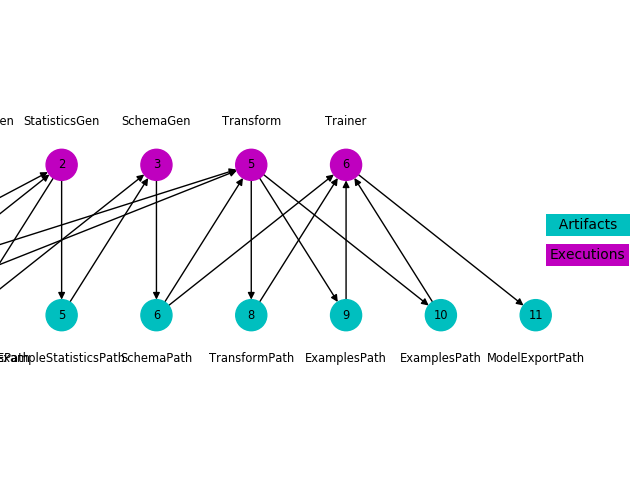

In [7]:
# Try different IDs here. Click stop in the plot when changing IDs.
%matplotlib notebook

store.plot_artifact_lineage(11)

<IPython.core.display.Javascript object>


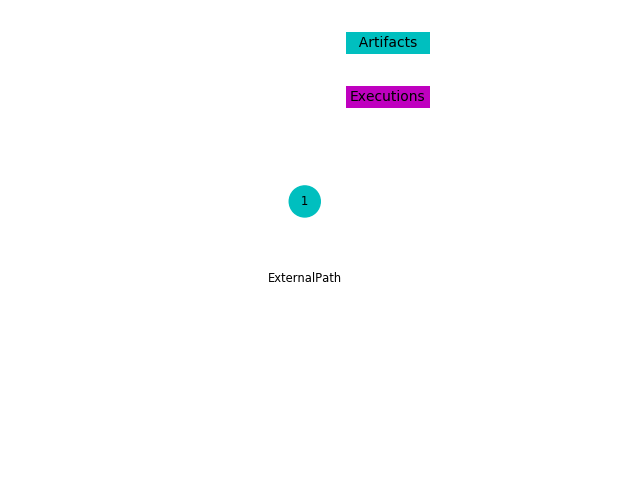

In [9]:
%matplotlib notebook

store.plot_artifact_lineage(1)

<IPython.core.display.Javascript object>


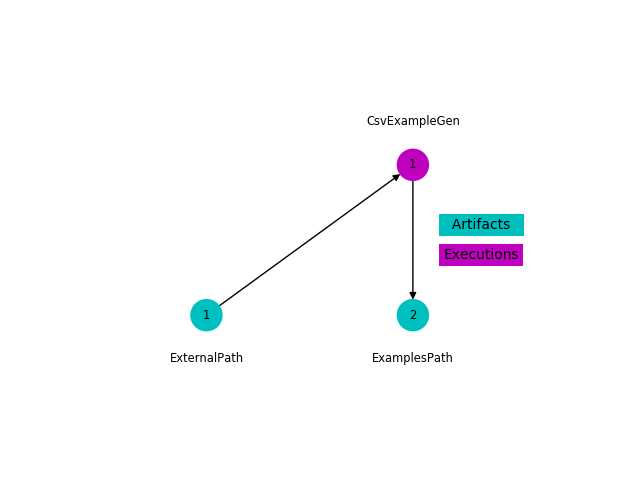

In [8]:
%matplotlib notebook

store.plot_artifact_lineage(2)